# (Pycaret) NLP

Last Update : 2022/09/22

Pycaret Version : 2.3.10

Author : [jhbale11](https://github.com/jhbale11)

## Table of Contents

### [Import Libraries](#Import-the-Libraries)
### [Load Data](#Load-Data)

### 1. [Setup](#Setup)
### 2. [Compare Models](#Compare-Models)
### 3. [Create Model](#Create-Model)
### 4. [Assign Model](#Assign-Model)
### 5. [Plot Model](#Plot-Model)
### 6. [Save Model](#Save-Model)

# Import the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from pycaret.nlp import *

warnings.filterwarnings(action='ignore')

plt.figure(figsize=(20,5))
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 1440x360 with 0 Axes>

In [3]:
from pycaret.utils import version
version()

'2.3.10'

# Load Data

For this tutorial we will be using data from Kiva Microfunds https://www.kiva.org/. Kiva Microfunds is a non-profit that allows individuals to lend money to low-income entrepreneurs and students around the world. Since starting in 2005, Kiva has crowd-funded millions of loans with a repayment rate of around 98%. At Kiva, each loan request includes both traditional demographic information on the borrower, such as gender and location, as well as a personal story. In this tutorial we will use the text given in personal story to gain insights of the dataset and understand hidden semantic structure in the text. 

The dataset contains 6,818 samples. Short description of features are below:

- country: country of borrower
- en: Personal story of borrower when applied for loan
- gender: Gender (M=male, F=female)
- loan_amount: Amount of loan approved and disbursed
- nonpayment: Type of lender (Lender = personal registered user on Kiva website, Partner = microfinance institution who work with Kiva to find and fund loans)
- sector: sector of borrower
- status: status of loan (1-default, 0-repaid)

In this tutorial we will only use en column to create topic model.

In [4]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [5]:
data.shape

(6818, 7)

In [6]:
data.head(5)

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [7]:
data.dtypes

country        object
en             object
gender         object
loan_amount     int64
nonpayment     object
sector         object
status          int64
dtype: object

# Setup

To start with Pycaret, the first step is to import all methods and attributes from pycaret's regression model

Pycaret workflow always starts with `setup` function which prepares the environment for the entire ML pipeline. 

Thus `setup` must be executed before any other functions.

- `Removing Numeric Character`s: All numeric characters are removed from the text. They are replaced with blanks.

- `Removing Special Characters`: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.

- `Word Tokenization` : Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. Read More

- `Stopword Removal` : A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. Read More

- `Bigram Extraction`: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York" Read More

- `Trigram Extraction`: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. Read More

- `Lemmatizing` : Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. Read More

- `Custom Stopwords`: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using custom_stopwords parameter. In next tutorial, Natural Language Processing Tutorial (NLP102) - Level Intermediate we will demonstrate the use of custom_stopwords parameter inside setup().


In [8]:
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,6818
Vocab Size,10753
Custom Stopwords,False


### `setup()` Parameters
- `session_id` : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

- `Number of Documents` : Number of documents or samples in dataset if dataframe is passed.

- `Vocab Size` : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

Notice that all text pre-processing steps are performed automatically when you execute `setup()`. These steps are imperative to perform any NLP experiment. `setup()` function prepares the corpus and dictionary that is ready-to-use for the topic models that you can create using `create_model()` function.

# Compare Models

In [9]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


# Create Model

In [10]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=10753, num_topics=4, decay=0.5, chunksize=100)


In [11]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)
print(lda2)

LdaModel(num_terms=10753, num_topics=6, decay=0.5, chunksize=100)


In [18]:
nmf = create_model('nmf')
print(nmf)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)


# Assign Model

In [12]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Dominican Republic,group woman look receive small loan take small...,F,1225,partner,Retail,0,0.264636,0.001636,0.625594,0.108135,Topic 2,0.63
1,Dominican Republic,walk forward group entrepreneur seek second lo...,F,1975,lender,Clothing,0,0.344405,0.001467,0.289807,0.364321,Topic 3,0.36
2,Dominican Republic,group people hope start business group look re...,F,2175,partner,Clothing,0,0.258666,0.002080,0.523707,0.215546,Topic 2,0.52
3,Dominican Republic,vive live group woman look receive loan young ...,F,1425,partner,Clothing,0,0.176977,0.001708,0.622891,0.198424,Topic 2,0.62
4,Dominican Republic,vive large group people hope take loan many se...,F,4025,partner,Food,0,0.315186,0.001597,0.420663,0.262555,Topic 2,0.42


In [19]:
nmf_results = assign_model(nmf)
nmf_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Dominican Republic,group woman look receive small loan take small...,F,1225,partner,Retail,0,0.011173,0.006520,0.000838,0.020552,Topic 3,0.53
1,Dominican Republic,walk forward group entrepreneur seek second lo...,F,1975,lender,Clothing,0,0.019245,0.004134,0.001459,0.015899,Topic 0,0.47
2,Dominican Republic,group people hope start business group look re...,F,2175,partner,Clothing,0,0.028244,0.004027,0.004662,0.016530,Topic 0,0.53
3,Dominican Republic,vive live group woman look receive loan young ...,F,1425,partner,Clothing,0,0.013371,0.000000,0.000000,0.025130,Topic 3,0.65
4,Dominican Republic,vive large group people hope take loan many se...,F,4025,partner,Food,0,0.025329,0.003603,0.000000,0.013548,Topic 0,0.60


# Plot Model

The `plot_model()` function provides tools to further analyze the performance of a model.

- Word Token Frequency - `‘frequency’`
- Word Distribution Plot - `‘distribution’`
- Bigram Frequency Plot - `‘bigram’`
- Trigram Frequency Plot - `‘trigram’`
- Sentiment Polarity Plot - `‘sentiment’`
- Part of Speech Frequency - `‘pos’`
- t-SNE (3d) Dimension Plot - `‘tsne’`
- Topic Model (pyLDAvis) - `‘topic_model’`
- Topic Infer Distribution - `‘topic_distribution’`
- Wordcloud - `‘wordcloud’`
- UMAP Dimensionality Plot - `‘umap’`

In [21]:
plot_model(lda, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.164688  0.139003       1        1  36.754396
0      0.075029  0.237725       2        1  29.162038
2      0.232054 -0.050160       3        1  28.165807
1     -0.142394 -0.326568       4        1   5.917759, topic_info=          Term         Freq        Total Category  logprob  loglift
616       farm  3162.000000  3162.000000  Default  30.0000  30.0000
1626    farmer  2214.000000  2214.000000  Default  29.0000  29.0000
2222   farming  1354.000000  1354.000000  Default  28.0000  28.0000
477      stock  2992.000000  2992.000000  Default  27.0000  27.0000
15       group  3110.000000  3110.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
34       small   146.311757  1988.613948   Topic4  -5.1889   0.2178
6804     maize   122.926948   783.164034   Topic4  -5.3631   0.9755
16      income   146.070131  3667.122924   Topic4  -5.1906  -0.3959
100       area   115.194651  1329.824664   Topic4  -5.4280   0.3810
564   activity   111.871654   454.786584   Topic4  -5.4573   1.4247

[282 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.629811   able
0         2  0.132064   able
0         3  0.238036   able
0         4  0.000201   able
5014      3  0.024163   acre
...     ...       ...    ...
123       2  0.310483   year
123       3  0.156788   year
123       4  0.000129   year
5478      1  0.075909  yield
5478      4  0.921754  yield

[529 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



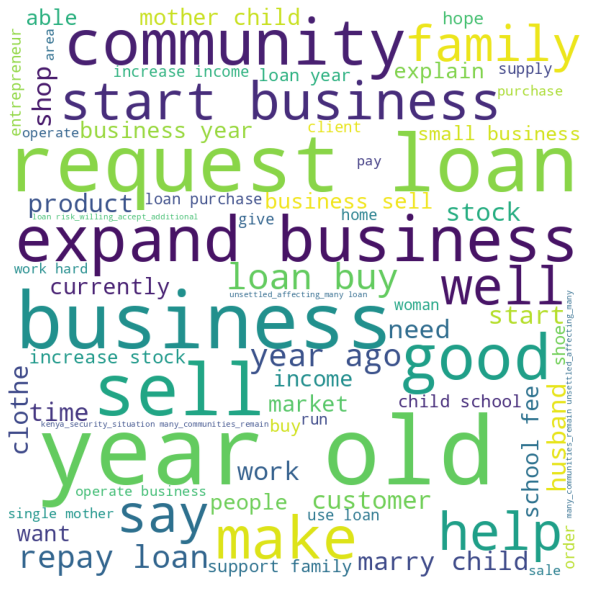

In [23]:
plot_model(lda, plot='wordcloud')

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



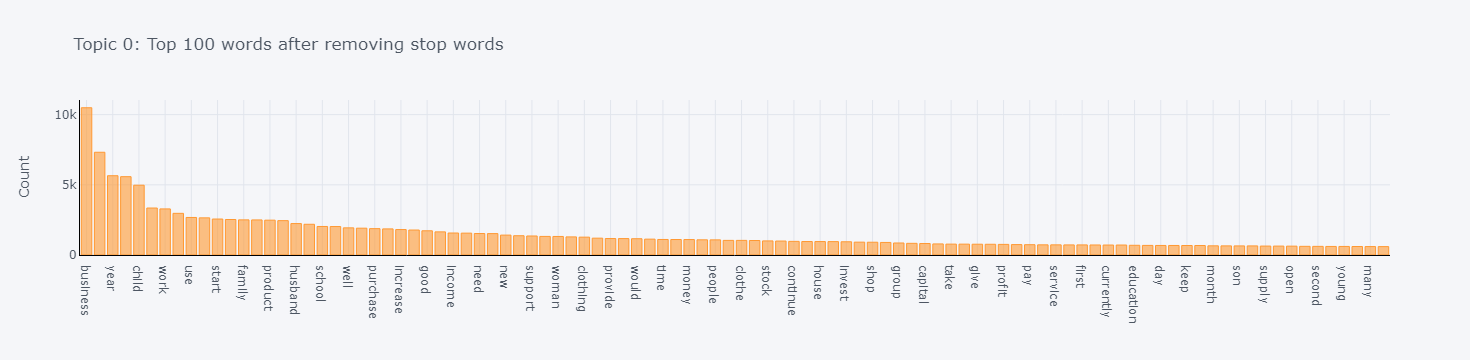

In [26]:
plot_model(nmf)

# Save Model

In [14]:
save_model(lda, './lda_model')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7f582adbd450>, './lda_model.pkl')

In [ ]:
save_model(nmf, './nmf_model')